In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [288]:
df=pd.read_excel(r'D:\Netflix\Practice\flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [289]:
df.shape

(10683, 11)

In [290]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [292]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [293]:
df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [294]:
df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [295]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [296]:
df[df.isnull().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [297]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df.head()

c:\Users\ptt920460\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\ptt920460\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\ptt920460\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\ptt920460\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [298]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y')

In [299]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [300]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

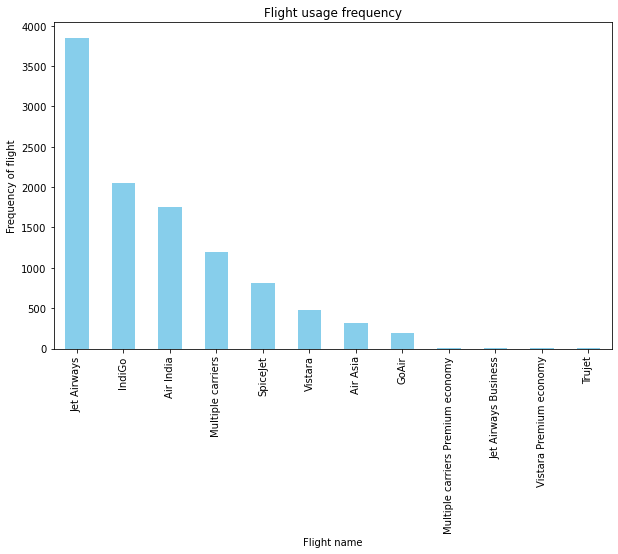

In [301]:
flight_counts=df['Airline'].value_counts()
plt.figure(figsize=(10,6))
flight_counts.plot(kind='bar',color='skyblue')
plt.title("Flight usage frequency")
plt.xlabel("Flight name")
plt.ylabel('Frequency of flight')
plt.show()

Maximum time jet airways was used

In [302]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [303]:
df['Date_of_Journey'].max(),df['Date_of_Journey'].min()

(Timestamp('2019-12-06 00:00:00'), Timestamp('2019-01-03 00:00:00'))

In [304]:
df['Price'].min(),df['Price'].max()

(1759, 79512)

In [305]:
cheapest_flight=df.groupby('Airline').min().reset_index()
cheapest_flight

C:\Users\ptt920460\AppData\Local\Temp\ipykernel_23528\2511045609.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  cheapest_flight=df.groupby('Airline').min().reset_index()


,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Additional_Info,Price
0,Air Asia,2019-01-03,Banglore,Banglore,04:55,01:20 02 Apr,10h 25m,No info,3383
1,Air India,2019-01-03,Banglore,Banglore,00:30,01:20 02 Apr,10h,1 Long layover,2050
2,GoAir,2019-01-03,Banglore,Banglore,05:45,00:05 25 Mar,2h 35m,No info,3398
3,IndiGo,2019-01-03,Banglore,Banglore,00:25,00:05 02 Jun,10h 15m,No Info,2227
4,Jet Airways,2019-01-03,Banglore,Banglore,00:20,00:30 13 Mar,10h,1 Long layover,1840
5,Jet Airways Business,2019-01-03,Banglore,Cochin,05:45,04:25 04 Mar,4h 40m,Business class,46490
6,Multiple carriers,2019-01-03,Delhi,Cochin,00:20,00:55 22 May,10h,In-flight meal not included,5797
7,Multiple carriers Premium economy,2019-03-21,Delhi,Cochin,06:00,01:35 22 Mar,10h 20m,No info,9845
8,SpiceJet,2019-01-03,Banglore,Banglore,05:45,00:05 02 Apr,1h 20m,1 Long layover,1759
9,Trujet,2019-06-03,Mumbai,Hyderabad,13:05,16:20,3h 15m,No info,4140


In [306]:
overall_cheapest_flight=cheapest_flight.loc[cheapest_flight['Price'].idxmin()]
overall_cheapest_flight

Airline                       SpiceJet
Date_of_Journey    2019-01-03 00:00:00
Source                        Banglore
Destination                   Banglore
Dep_Time                         05:45
Arrival_Time              00:05 02 Apr
Duration                        1h 20m
Additional_Info         1 Long layover
Price                             1759
Name: 8, dtype: object

In [307]:
overall_expensive_flight=cheapest_flight.loc[cheapest_flight['Price'].idxmax()]
overall_expensive_flight

Airline            Jet Airways Business
Date_of_Journey     2019-01-03 00:00:00
Source                         Banglore
Destination                      Cochin
Dep_Time                          05:45
Arrival_Time               04:25 04 Mar
Duration                         4h 40m
Additional_Info          Business class
Price                             46490
Name: 5, dtype: object

Cheapest airline is Spicejet
Expensive airline is jet Airways

In [308]:
df['Destination']=df['Destination'].replace({'New Delhi':'Delhi'})

In [309]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [310]:
df.drop('Route',axis=1,inplace=True)

In [311]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [312]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [313]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [314]:
# label encoding

df['Total_Stops']=df['Total_Stops'].map({'non-stop':'0','1 stop':'1','2 stops':'2','3 stops':'3','4 stops':'4',np.nan:1})
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,2019-01-03,Banglore,Delhi,16:50,21:35,4h 45m,1,No info,13302


In [315]:
df['Total_Stops'].isnull().sum()

0

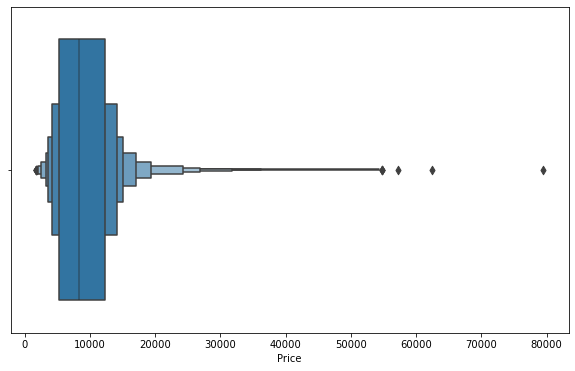

In [316]:
plt.figure(figsize=(10,6))
sns.boxenplot(data=df,x='Price')
plt.show()

In [317]:
# converted Date column to 3 separate column day,month and year

df['Day']=df['Date_of_Journey'].dt.day
df['Month']=df['Date_of_Journey'].dt.month
df['Year']=df['Date_of_Journey'].dt.year


In [320]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [321]:
df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1,No info,6218,5,12,2019
4,IndiGo,Banglore,Delhi,16:50,21:35,4h 45m,1,No info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,0,No info,4107,4,9,2019
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,0,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,0,No info,7229,27,4,2019
10681,Vistara,Banglore,Delhi,11:30,14:10,2h 40m,0,No info,12648,3,1,2019


In [322]:
df['Arrival_Time'].str.split(' ').str[0]

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [323]:
df['Arrival _hours']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_mints']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]
df.drop('Arrival_Time',axis=1,inplace=True)

In [325]:
df['Arrival _hours']=df['Arrival _hours'].astype(int)
df['Arrival_mints']=df['Arrival_mints'].astype(int)


In [327]:
df['Dept_Hour']=df['Dep_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Dept_mints']=df['Dep_Time'].str.split(' ').str[0].str.split(':').str[1]
df['Dept_Hour']=df['Dept_Hour'].astype(int)
df['Dept_mints']=df['Dept_mints'].astype(int)
df.drop('Dep_Time',axis=1,inplace=True)

In [328]:
df['Duration']=pd.to_timedelta(df['Duration'])

In [329]:
df['Duration_hr']=df['Duration'].dt.components['hours']
df['Duration_mints']=df['Duration'].dt.components['minutes']

In [330]:
df.drop('Duration',axis=1,inplace=True)

In [333]:
from sklearn.preprocessing import OneHotEncoder

In [334]:
enc= OneHotEncoder()

In [335]:
enc.fit_transform(df[['Airline','Source','Destination']])

<10683x22 sparse matrix of type '<class 'numpy.float64'>'
	with 32049 stored elements in Compressed Sparse Row format>

In [336]:
enc.fit_transform(df[['Airline','Source','Destination']]).toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [337]:
pd.DataFrame(enc.fit_transform(df[['Airline','Source','Destination']]).toarray(),columns=enc.get_feature_names_out())

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
